In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14



In [2]:
import numpy as np
import pandas as pd
import glob

In [3]:
def histoplot(df, dfvar, num_bins = 10, figsize=(6, 4), title=""):
    
    fig, ax0 = plt.subplots(1, 1, figsize=figsize)
    _, _, _ = ax0.hist(df[dfvar], num_bins, label=dfvar)
    ax0.set_xlabel(dfvar)
    ax0.set_ylabel('Events/bin')
    ax0.set_title(title)
    ax0.legend()

    fig.tight_layout()
    plt.show()

In [4]:
def select_image_from_df(evtsel = 10):
    gevt = df.groupby('event')
    n = 8
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        if event_number == evtsel:
            for _, row in group.iterrows():
                sensor_id = row['sensor_id']
                charge = row['amplitude']
                charge_matrix[sensor_id // n, sensor_id % n] = charge
            break
    return charge_matrix

In [5]:
def plot_image(charge_matrix, figsize=(6, 6)):
    plt.figure(figsize=figsize)
    plt.imshow(charge_matrix, cmap='viridis', interpolation='none')
    plt.colorbar(label='Charge')
    plt.title(f'Charge Matrix for Event {evtsel}')
    plt.xlabel('Sensor X')
    plt.ylabel('Sensor Y')
    plt.show()

In [6]:
def read_histograms(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    histograms = {}
    current_histogram = None
    bin_edges = []
    bin_values = []

    for line in lines:
        if line.startswith("# Histogram:"):
            if current_histogram:
                histograms[current_histogram] = (bin_edges, bin_values)
            current_histogram = line.split(":")[1].strip()
            bin_edges = []
            bin_values = []
        elif current_histogram and line.strip():
            parts = line.split()
            bin_edges.append(float(parts[0]))
            bin_edges.append(float(parts[1]))
            bin_values.append(float(parts[2]))
    
    if current_histogram:
        histograms[current_histogram] = (bin_edges, bin_values)

    return histograms


In [7]:
def plot_histogram(histograms, name, figsize=(6, 6)):
    edges, values = histograms[name]
    bin_edges = edges[::2]  # taking only the lower edges
    bin_width = edges[1] - edges[0]  # assuming uniform bin width
    
    plt.figure(figsize=figsize)    
    plt.bar(bin_edges, values, width=bin_width, align='edge')
    plt.title(f"Histogram: {name}")
    plt.xlabel("Bin")
    plt.ylabel("Count")
    plt.show()


## Sensor data
- Contains a vector of times and chage

In [8]:
df = pd.read_csv("sensor_data.csv", header=0)
df

,event,sensor_id,time,charge
0,186,23,0,45
1,186,23,1,34
2,186,23,2,22
3,186,23,3,10
4,186,23,4,11
...,...,...,...,...
777257,991,50,8,1
777258,991,50,9,2
777259,991,50,10,1
777260,991,50,11,1


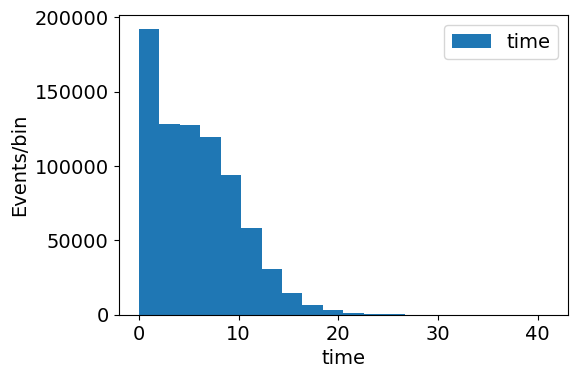

In [9]:
histoplot(df, "time", num_bins = 20, figsize=(6, 4), title="")

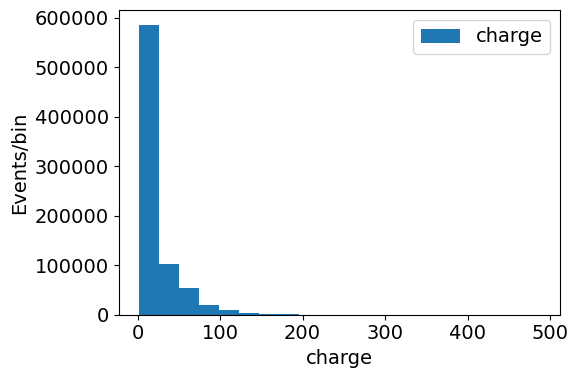

In [10]:
histoplot(df, "charge", num_bins = 20, figsize=(6, 4), title="")

## Integrated sensor data
- Sensors and chage

In [11]:
df = pd.read_csv("integrated_sensor_data.csv", header=0)
df

,event,sensor_id,amplitude
0,186,23,139
1,186,48,248
2,186,0,210
3,186,50,283
4,186,33,419
...,...,...,...
63995,991,56,118
63996,991,63,194
63997,991,34,250
63998,991,0,176


In [26]:
events = np.unique(df['event'])

In [30]:
events.shape[0]

1000

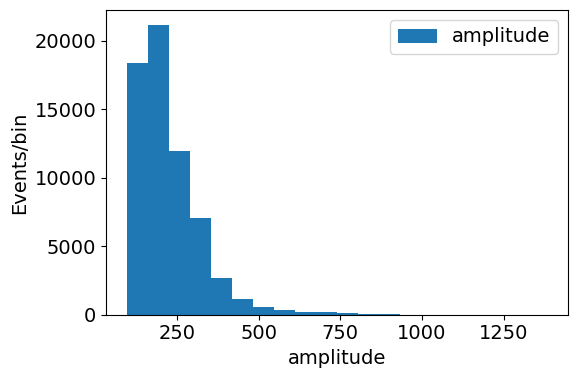

In [12]:
histoplot(df, "amplitude", num_bins = 20, figsize=(6, 4), title="")

## Plot control histograms

In [13]:
histograms = read_histograms("histograms.txt")

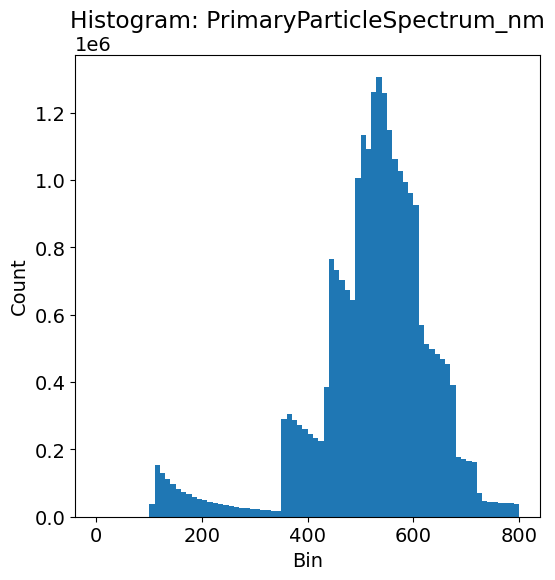

In [15]:
plot_histogram(histograms, "PrimaryParticleSpectrum_nm", figsize=(6, 6))

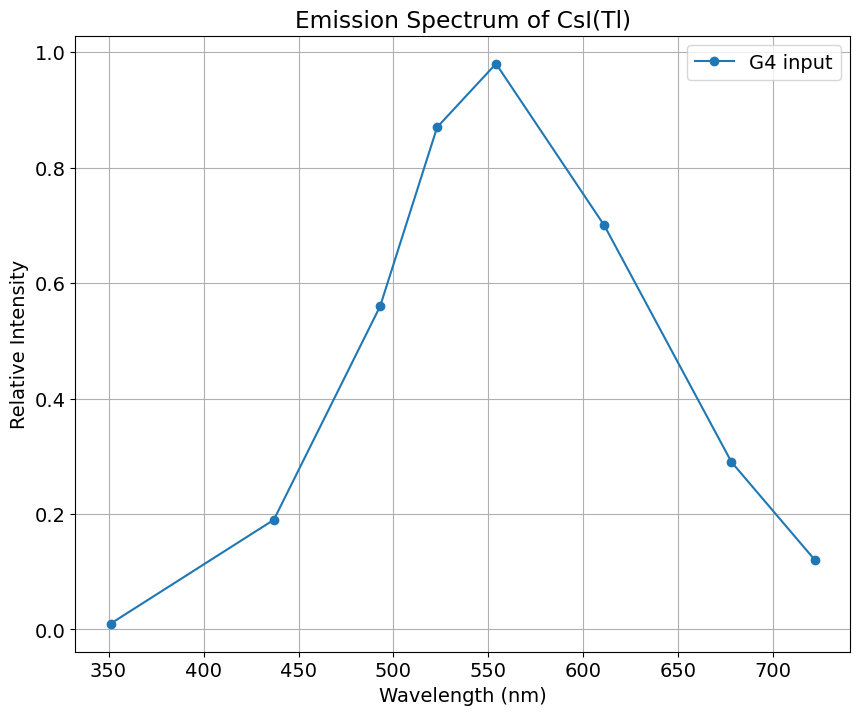

In [16]:
wavelengths = [351, 437, 493, 523, 554, 611, 678, 722]
intensities = [0.01, 0.19, 0.56, 0.87, 0.98, 0.7, 0.29, 0.12]


plt.plot(wavelengths, intensities, marker='o', label="G4 input")
plt.title('Emission Spectrum of CsI(Tl)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Relative Intensity')
plt.legend()
plt.grid(True)
plt.show()

### Plot a few events

In [17]:
evtsel = 0
charge_matrix = select_image_from_df(evtsel)


In [18]:
charge_matrix

array([[139., 150., 189., 274., 350., 446., 446., 366.],
       [129., 198., 204., 324., 379., 509., 493., 401.],
       [138., 162., 240., 324., 329., 426., 385., 358.],
       [181., 147., 197., 230., 296., 311., 287., 239.],
       [157., 153., 175., 219., 238., 268., 224., 214.],
       [160., 170., 159., 171., 174., 190., 146., 134.],
       [165., 147., 170., 164., 151., 176., 156., 144.],
       [119., 142., 152., 151., 162., 163., 143., 143.]])

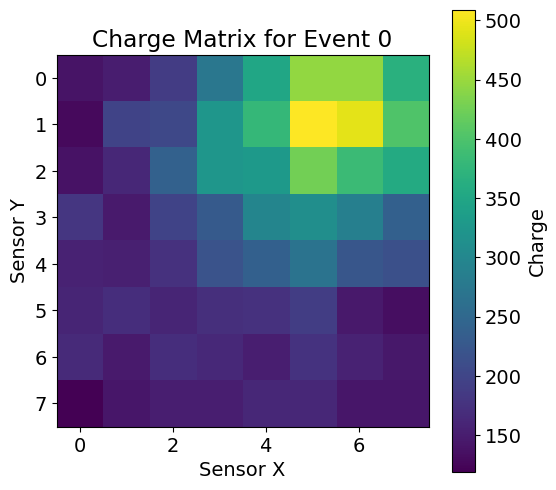

In [19]:
plot_image(charge_matrix)

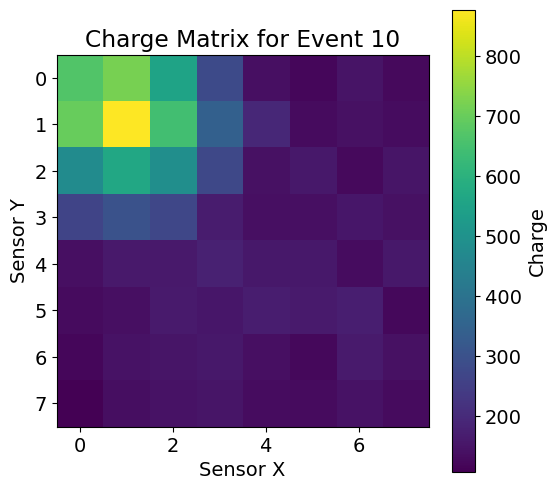

In [20]:
evtsel = 10
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

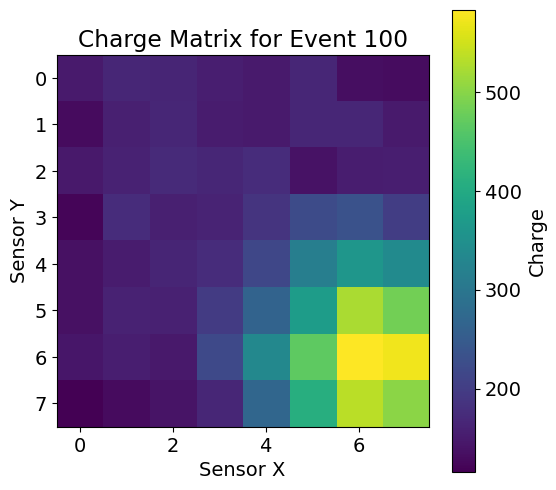

In [21]:
evtsel = 100
charge_matrix = select_image_from_df(evtsel)
plot_image(charge_matrix)

In [31]:
images = np.zeros((events.shape[0],8,8))

In [32]:
images.shape

(1000, 8, 8)

In [40]:
def collect_images(df, n= 8):
    events = np.unique(df['event'])
    images = np.zeros((events.shape[0],n,n))
    gevt = df.groupby('event')
    i=0
    charge_matrix = np.zeros((n, n))
    for event_number, group in gevt:
        for _, row in group.iterrows():
            sensor_id = row['sensor_id']
            charge = row['amplitude']
            charge_matrix[sensor_id // n, sensor_id % n] = charge
        images[i]= charge_matrix
        i+=1
    return images

In [41]:
images = collect_images(df)

In [42]:
images.shape

(1000, 8, 8)

In [43]:
np.save('images.npy', images)

In [50]:
images = np.load('images2.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'images2.npy'

In [48]:
images.shape

(1000, 8, 8)

In [49]:
images

array([[[ 139.,  150.,  189., ...,  446.,  446.,  366.],
        [ 129.,  198.,  204., ...,  509.,  493.,  401.],
        [ 138.,  162.,  240., ...,  426.,  385.,  358.],
        ...,
        [ 160.,  170.,  159., ...,  190.,  146.,  134.],
        [ 165.,  147.,  170., ...,  176.,  156.,  144.],
        [ 119.,  142.,  152., ...,  163.,  143.,  143.]],

       [[ 160.,  182.,  190., ...,  199.,  196.,  171.],
        [ 208.,  240.,  249., ...,  259.,  232.,  186.],
        [ 207.,  244.,  317., ...,  267.,  253.,  231.],
        ...,
        [ 205.,  256.,  261., ...,  250.,  246.,  194.],
        [ 187.,  193.,  220., ...,  215.,  217.,  196.],
        [ 125.,  152.,  238., ...,  187.,  167.,  162.]],

       [[ 145.,  143.,  150., ...,  136.,  150.,  119.],
        [ 163.,  125.,  193., ...,  148.,  166.,  123.],
        [ 278.,  310.,  195., ...,  159.,  155.,  128.],
        ...,
        [ 631.,  588.,  354., ...,  175.,  163.,  130.],
        [ 430.,  408.,  248., ...,  164.,  16